# EDA of Hotel Booking's Demand 

This project aims to create meaningful estimators from the data set we have and to perform Exploratory Data Analysis so that if anyone who wishes to proceed with the Machine Learning Model, can do so.

This data set contains a single file that compares various booking information between two hotels: a city hotel and a resort hotel. Both hotels are located in Portugal (southern Europe) (“H1 at the resort region of Algarve and H2 at the city of Lisbon”).

This dataset can be downloaded from [HERE](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

The tools for data analysis used in this project are the packages Numpy and Pandas, and to visualize and explore the data: Matplotlib and Seaborn.

We try to answer these questions:


1.  **Where do the maximum number of  guests come from?**
2.  **How much do guests pay for a room per night?**
3.  **How does the price per night vary over the year?**
4.  **Which are the busiest months for hotel bookings?**
5.  **How long do people typically stay at the hotels?**
6.  **What are the booking patterns by market segment?**
7.  **How many bookings were canceled, and which month had the highest number of cancellations?**
8.  **Is there a repeated guest effect on cancellations?**
9.  **What is the relationship between the number of nights spent at hotels and booking types (resort vs. city)?**
10.  **How does the deposit affect cancellations, and is there a difference by market segment?**

Let's start. 

#### Import all necessary libraries

In [177]:
import pandas as pd                 # Used for data manipulation and analysis
import numpy as np                  # Used for scientific computing
import matplotlib.pyplot as plt     # Used for plotting graphs
import seaborn as sns               # Used for plotting graphs
import re                           # Used for regular expression

palette = sns.color_palette("Oranges_r")

Let's import and display the data set.

In [178]:
# Read the dataset into a dataframe named data
data = pd.read_csv("../Hotels_Analysis/dataset/hotel_bookings.csv")


In [179]:
# Let's see number of rows and columns in our dataset
data.shape


(119390, 32)

So we have 119390 rows and 32 columnsm, which is a lot of data to work with.

#### Let's see first few rows of the data set.

In [180]:
# Display top 5 rows of the table.
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Data Pre-processing

Let's copy our dataset so that our original dataset remains unchanged. 

In [181]:
# Copy the dataset
df = data.copy()

Let's clean our column names by removing spaces and making them lowercase.

In [182]:
# Clean column names
df.columns = [re.sub(r"([A-Z])", r"_\1", col).lower() for col in df.columns]

Let's check for missing values in our dataset.

In [183]:
# Let's check for null values and there percentage in each column
# Also as we have too many columns, let's sort the columns in descending order of percentage of null values

null_value = pd.DataFrame(
    {
        "Null Values": df.isna().sum(),
        "Percentage Null Values": (df.isna().sum()) / (df.shape[0]) * (100),
    }
)
null_value.sort_values(by="Percentage Null Values", ascending=False)[:10]


,Null Values,Percentage Null Values
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


So we do have null values in our dataset. Let's try to handle them  <br />

In the `agent` and the `company` column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [184]:
# Replace missing values in `agent` and `company` columns with 0.0`
df[["agent", "company"]] = df[["agent", "company"]].fillna(0.0)

`Children` column contains the count of children, so we will replace all the missing values with the rounded mean value.

In [185]:
# Replace the null values in Children column with the mean.
df["children"].fillna(round(data.children.mean()), inplace=True)


As `Country` column is a catagorical column, we will replace the missing values with the most frequent country, or **MODE**. Mode is the value that appears most frequently in a data set.

In [186]:
# Replace missing values in the country column with the mode.
df["country"].fillna(data.country.mode().to_string(), inplace=True)

In [187]:
# Check the data with no adults, no children and no babies
df[(df.adults + df.children + df.babies) == 0].shape

(180, 32)

Filter out rows with zero adults, children, and babies, indicating unbooked rooms

In [188]:
# Drop the data with no adults, no children and no babies
df.drop(df[(df.adults + df.children + df.babies) == 0].index, inplace=True)

#### Data types

In [189]:
# Let's check the data types of each column
dtypes = pd.DataFrame({"Dtypes": df.dtypes})
dtypes


,Dtypes
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


We can observe that, there are some columns like `Children`, `Company`, and `Agent`, that are float type but their values are only in integers. So we will convert them to the integer type.

In [190]:
# Convert the datatype of Childern, Company and Agent from float to int
df[["children", "company", "agent"]] = df[["children", "company", "agent"]].astype(
    "int64"
)

# Let's move on to EDA

Q. **Where do the maximum number of guests come from?**

In [191]:
# Find the top 10 countries with the highest number of customers
top_countries_customers_count = df["country"].value_counts().head(5)
top_countries_customers_count


country
PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
Name: count, dtype: int64

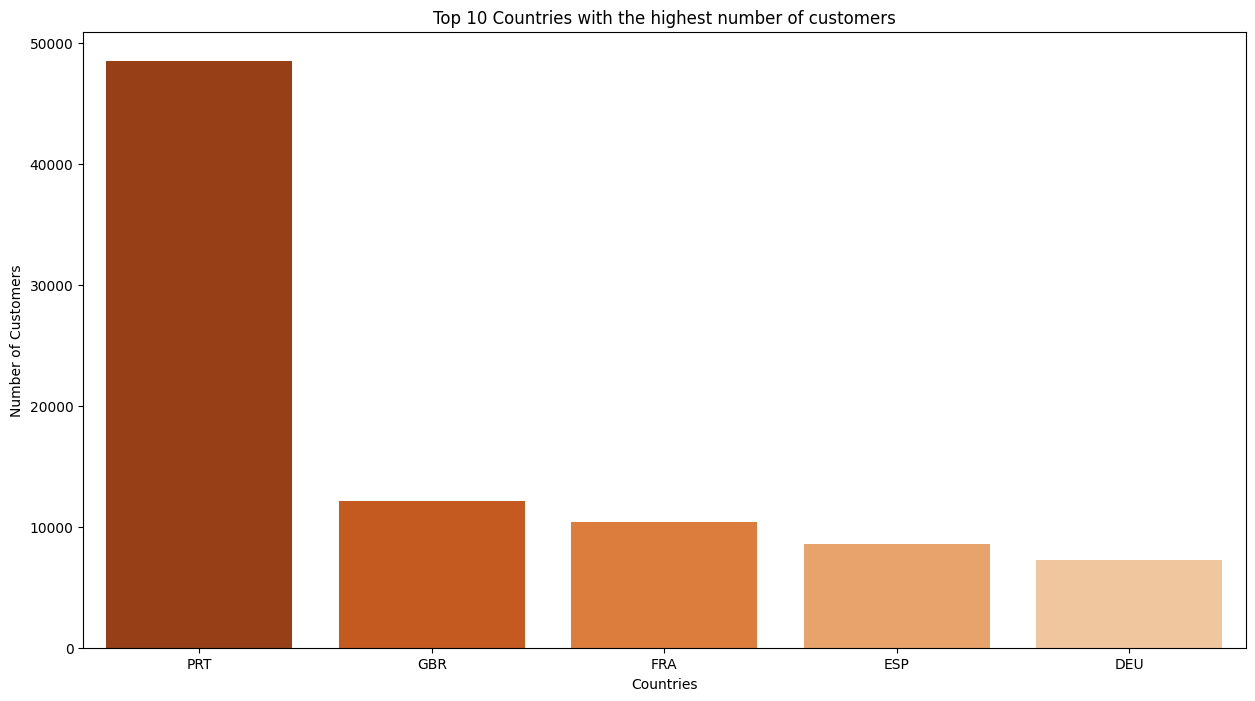

In [192]:
# Let's plot the top countries with the highest number of customers
plt.figure(figsize=(15, 8))
sns.barplot(
    x=top_countries_customers_count.index,
    y=top_countries_customers_count.values,
    palette=palette,
)
plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.title("Top 10 Countries with the highest number of customers")
plt.show()


According to the above graph, we can see that most of the guests are from: <br />

`PRT` - Portugal

`GBR` - United Kingdom

`FRA` - France

`ESP` - Spain

`DEU` - Germany

Q. **How much do guests pay for a room per night?**

Let's check out the price paid (in one night) by the guests who are staying in these hotels. Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.  <br />

In [198]:
# Let's create a resort column to find the number of customers who booked a resort hotel and who booked a city hotel

resort_hotel = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

As we have babies too in our dataset, let's remove them from adr calculation.

In [202]:
# Calculate the Average Daily Rate (ADR) per paying guest (excluding babies) for resort hotel
resort_hotel.loc[:, "adr_per_paying_guest"] = resort_hotel["adr"] / (
    resort_hotel["adults"] + resort_hotel["children"]
)

# Calculate the Average Daily Rate (ADR) per paying guest (excluding babies) for city hotel
city_hotel.loc[:, "adr_per_paying_guest"] = city_hotel["adr"] / (
    city_hotel["adults"] + city_hotel["children"]
)


Let's print out the mean values from both the data frames.

In [213]:
# Calculate and display the average nightly rates per person for non-canceled bookings.
print(
    "For all non-canceled reservations, encompassing various room types and meal plans:"
)
print(
    f"Resort Hotel: Average nightly rate per person is €{resort_hotel['adr_per_paying_guest'].mean():.2f}."
)
print(
    f"City Hotel: Average nightly rate per person is €{city_hotel['adr_per_paying_guest'].mean():.2f}."
)


For all non-canceled reservations, encompassing various room types and meal plans:
Resort Hotel: Average nightly rate per person is €47.49.
City Hotel: Average nightly rate per person is €59.27.


Normalize the Average Daily Rate (ADR) to account for the varying number of guests, ensuring a fair comparison.


In [214]:
# Calculate the normalized Average Daily Rate (ADR) per guest by dividing ADR by the total number of guests (adults + children).
df["adr_per_paying_guest"] = df["adr"] / (df["adults"] + df["children"])

# Filter the dataset to include only non-canceled bookings.
non_canceled_bookings = df[df["is_canceled"] == 0]

# Display the resulting DataFrame containing non-canceled bookings.
non_canceled_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp,adr_per_paying_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,52.200000
